https://www.doitpoms.ac.uk/tlplib/dielectrics/dielectric_refractive_index.php

https://www.shmoop.com/computer-science/radar/wave-equation-index-of-refraction.html

$$
\frac{n_{air}}{n_{snow}} = \frac{\sin(\theta_{snow})}{\sin(\theta_{air})}
$$

with 

$$
n = \sqrt{k}
$$

Where k is the dielectric constant of snow or air, n is the refractivity index, and $\theta$ is the angle from surface normal.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def snow_deflection_angle(inc_angle, ps):
    kair = 1.0006
    ks = 1 + 1.7*ps + 0.7*ps**2
    angle = np.rad2deg(np.arcsin( np.sin(inc_angle)* ((kair)**.5 / (ks)**.5)))
    return angle

In [4]:
def deflection_angles(inc_angle, ps_low = 0.3, ps_high = 0.35):
    inc_angle = np.deg2rad(inc_angle)
    k_air = 1.0006
    anglow = snow_deflection_angle(inc_angle, ps_low)
    anghigh = snow_deflection_angle(inc_angle, ps_high)
    return anglow, anghigh

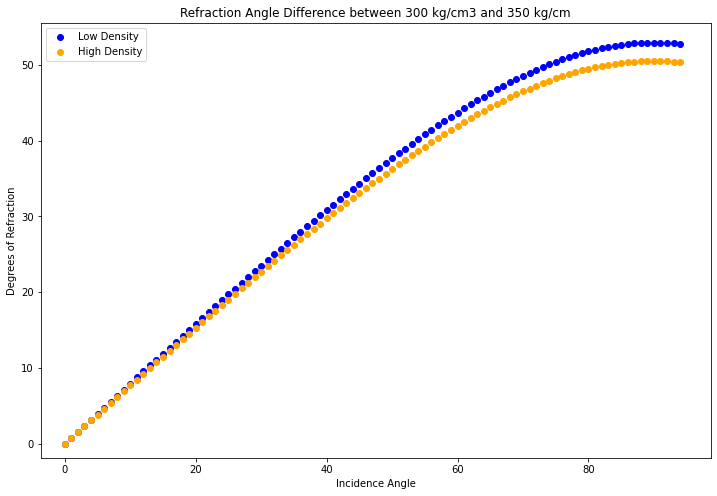

In [5]:
fig, ax = plt.subplots(figsize = (12,8))
for i in np.arange(0, 95, 1):
    anglow, anghigh = deflection_angles(i)
    ax.scatter(i, anglow, label="Low Density" if i == 1 else "", color = 'blue')
    ax.scatter(i, anghigh, label="High Density" if i == 1 else "", color = 'orange')
plt.xlabel('Incidence Angle')
plt.ylabel('Degrees of Refraction')
plt.title('Refraction Angle Difference between 300 kg/cm3 and 350 kg/cm')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


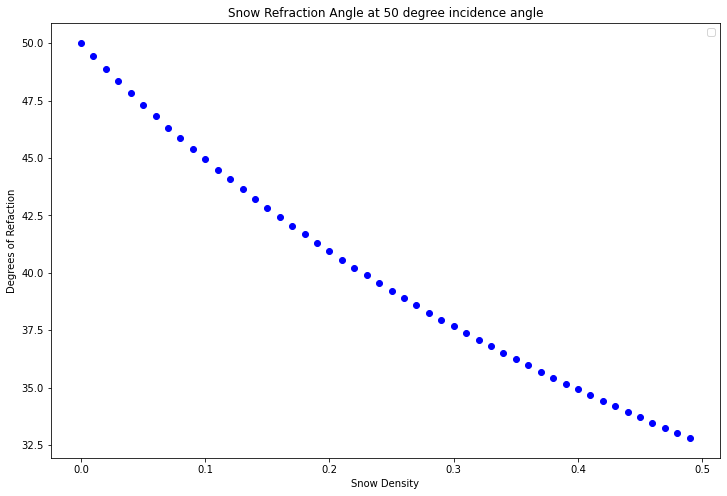

In [6]:
fig, ax = plt.subplots(figsize = (12,8))
for i in np.arange(0, 0.5, 0.01):
    ang = snow_deflection_angle(inc_angle=np.deg2rad(50), ps = i)
    ax.scatter(i, ang, color = 'blue')
plt.xlabel('Snow Density')
plt.ylabel('Degrees of Refaction')
plt.title('Snow Refraction Angle at 50 degree incidence angle')
plt.legend()
plt.show()

Assuming a 2.0 meter snowpack and using trig:

$$
\tan(\theta_{snow}) = \frac{groundPosition}{snowpackHeight}
$$

In [7]:
def grd_diff(inc, sd = 2):
    inc = np.deg2rad(inc)
    return np.tan(inc)*sd

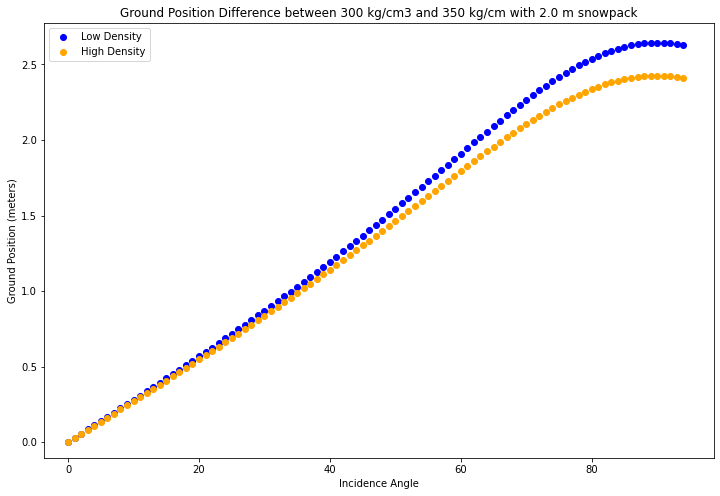

In [8]:
fig, ax = plt.subplots(figsize = (12,8))
for i in np.arange(0, 95, 1):
    anglow, anghigh = deflection_angles(i)
    gp_low = grd_diff(anglow)
    gp_high = grd_diff(anghigh)
    ax.scatter(i, gp_low, label="Low Density" if i == 1 else "", color = 'blue')
    ax.scatter(i, gp_high, label="High Density" if i == 1 else "", color = 'orange')
plt.xlabel('Incidence Angle')
plt.ylabel('Ground Position (meters)')
plt.title('Ground Position Difference between 300 kg/cm3 and 350 kg/cm with 2.0 m snowpack')
plt.legend()
plt.show()

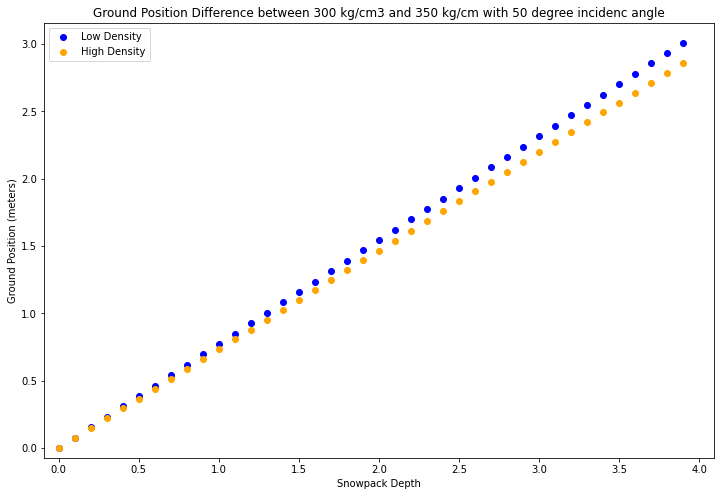

In [9]:
fig, ax = plt.subplots(figsize = (12,8))
for i in np.arange(0, 4, 0.1):
    anglow, anghigh = deflection_angles(inc_angle= 50)
    gp_low = grd_diff(anglow, sd = i)
    gp_high = grd_diff(anghigh, sd = i)
    ax.scatter(i, gp_low, label="Low Density" if i == 1 else "", color = 'blue')
    ax.scatter(i, gp_high, label="High Density" if i == 1 else "", color = 'orange')
plt.xlabel('Snowpack Depth')
plt.ylabel('Ground Position (meters)')
plt.title('Ground Position Difference between 300 kg/cm3 and 350 kg/cm with 50 degree incidenc angle')
plt.legend()
plt.show()

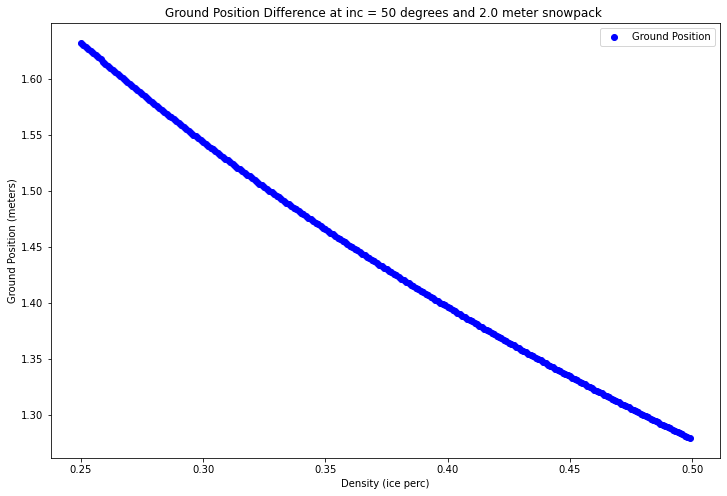

In [10]:
fig, ax = plt.subplots(figsize = (12,8))
# ax2 = ax.twinx()
# swe = 0.5
sd = 2
inc_angle = 50
for density in np.arange(0.25, 0.5, 0.001):
    # sd = swe/density
    ang = snow_deflection_angle(inc_angle=np.deg2rad(50), ps = density)
    gp = grd_diff(ang, sd = sd)
    ax.scatter(density, gp, label="Ground Position" if density == 0.26 else "", color = 'blue')
    # ax2.scatter(density, ang, label="Defraction Angle" if density == 0.26 else "", color = 'orange')
ax.set_xlabel('Density (ice perc)')
ax.set_ylabel('Ground Position (meters)')
# ax2.set_ylabel('Defraction Angle')
plt.title('Ground Position Difference at inc = 50 degrees and 2.0 meter snowpack ')
# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines, labels, loc=0)
plt.show()

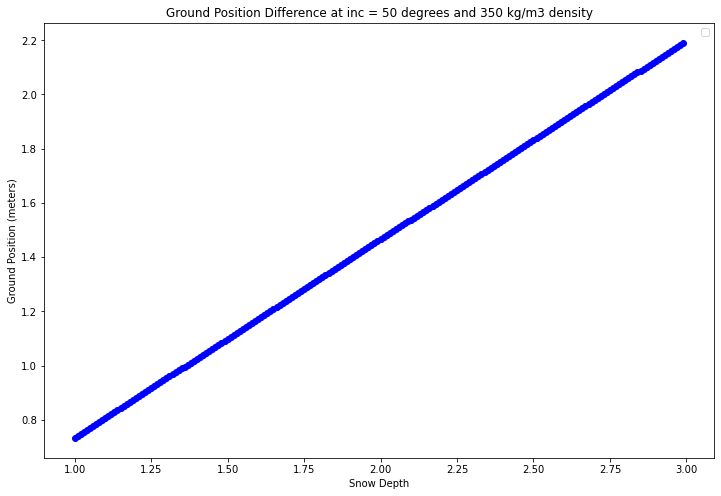

In [11]:
fig, ax = plt.subplots(figsize = (12,8))
# ax2 = ax.twinx()
# swe = 0.5
sd = 2
inc_angle = 50
density = 0.35
for sd in np.arange(1, 3, 0.01):
    # sd = swe/density
    ang = snow_deflection_angle(inc_angle=np.deg2rad(50), ps = density)
    gp = grd_diff(ang, sd = sd)
    ax.scatter(sd, gp, label="Ground Position" if density == 0.26 else "", color = 'blue')
    # ax2.scatter(density, ang, label="Defraction Angle" if density == 0.26 else "", color = 'orange')
ax.set_xlabel('Snow Depth')
ax.set_ylabel('Ground Position (meters)')
# ax2.set_ylabel('Defraction Angle')
plt.title('Ground Position Difference at inc = 50 degrees and 350 kg/m3 density')
# ask matplotlib for the plotted objects and their labels
lines, labels = ax.get_legend_handles_labels()
# lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines, labels, loc=0)
plt.show()

In [15]:
ang = snow_deflection_angle(inc_angle=np.deg2rad(45), ps = 0.3)
gp = grd_diff(ang, sd = 2)

In [16]:
gp

1.3658597488567865

In [17]:
ang

34.33033617796148